In [1]:
from mawiparse.utils import directory_read_pcap

In [2]:
vol_data, type_data, tcp_d, tcp_s, udp_d, udp_s = directory_read_pcap('data/2020-05-01/out/')

data/2020-05-01/out/
>> data/2020-05-01/out/output25 finished.
>> data/2020-05-01/out/output1 finished.
>> data/2020-05-01/out/output12 finished.
>> data/2020-05-01/out/output3 finished.
>> data/2020-05-01/out/output23 finished.
>> data/2020-05-01/out/output11 finished.
>> data/2020-05-01/out/output2 finished.
>> data/2020-05-01/out/output22 finished.
>> data/2020-05-01/out/output finished.
>> data/2020-05-01/out/output17 finished.
>> data/2020-05-01/out/output13 finished.
>> data/2020-05-01/out/output24 finished.
>> data/2020-05-01/out/output20 finished.
>> data/2020-05-01/out/output21 finished.
>> data/2020-05-01/out/output16 finished.
>> data/2020-05-01/out/output5 finished.
>> data/2020-05-01/out/output15 finished.
>> data/2020-05-01/out/output6 finished.
>> data/2020-05-01/out/output18 finished.
>> data/2020-05-01/out/output7 finished.
>> data/2020-05-01/out/output10 finished.
>> data/2020-05-01/out/output4 finished.
>> data/2020-05-01/out/output14 finished.
>> data/2020-05-01/out

### The code above can load the all pcap files in a given directory.
It will return two dict:
1. The volume dict, storing the # of packets sampled every minute (smaller granularity can be done in the future)
2. The type dict, storing the # of packets in different type (ICMP, TCP, UDP, etc.)

In [3]:
total_pkt = sum(vol_data.values())
print(f"This day has {total_pkt} packets in total.")
print(vol_data.values())

This day has 93841117 packets in total.
[6877085, 6731489, 5809737, 6111449, 5931740, 5742732, 6113935, 6445622, 6687550, 6578262, 6087171, 5693806, 6396072, 6390972, 6210425, 33070]


In [4]:
import matplotlib.pyplot as plt

The part below draws the plot of the # of packets sampled every minute

{0: 6877085, 1: 6731489, 2: 5809737, 3: 6111449, 4: 5931740, 5: 5742732, 6: 6113935, 7: 6445622, 8: 6687550, 9: 6578262, 10: 6087171, 11: 5693806, 12: 6396072, 13: 6390972, 14: 6210425, 15: 33070}


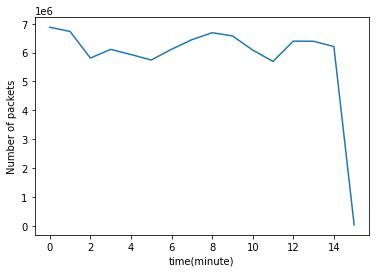

<Figure size 432x288 with 0 Axes>

In [5]:
print(vol_data)
plt.plot(range(len(vol_data)), vol_data.values())
plt.xlabel('time(minute)')
plt.ylabel('Number of packets')

plt.show()
plt.savefig('volume_sampled_by_minute')

The below part draws the packet type distribution

{<class 'bytes'>: 3571124, <class 'dpkt.icmp.ICMP'>: 34472173, <class 'dpkt.tcp.TCP'>: 40851714, <class 'dpkt.udp.UDP'>: 14297692, <class 'dpkt.icmp6.ICMP6'>: 59482, <class 'dpkt.ip6.IP6'>: 23}


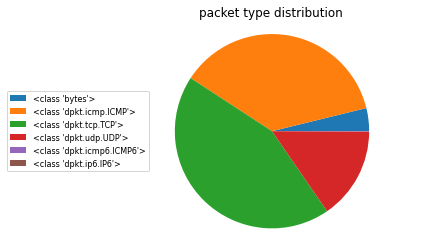

<Figure size 432x288 with 0 Axes>

In [6]:
print(type_data)

# data to plot
labels = []
sizes = []
for x, y in type_data.items():
    labels.append(x)
    sizes.append(y)

# plot
patches, texts = plt.pie(sizes)
plt.axis('equal')
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.3, .5), fontsize=8)
plt.title('packet type distribution')
plt.show()

plt.savefig('type_distribution')

In [7]:
print(tcp_d)
print(tcp_s)

{60226: 150, 12138: 45284, 39626: 50, 51825: 4003, 34481: 21419, 23: 796312, 48602: 110, 443: 1770697, 3333: 9768, 19019: 1765, 28878: 5987, 2222: 257558, 58221: 630221, 9091: 1163, 83: 2944, 9819: 1938, 29120: 3222, 80: 7185131, 2196: 224, 44444: 2953, 10770: 2348, 15235: 51, 59329: 107, 43227: 14634, 10736: 47938, 42212: 49428, 62490: 44378, 50348: 63949, 5807: 3815, 44404: 993, 7803: 2478, 6234: 51, 28015: 98556, 64557: 1383, 51510: 379569, 58630: 511, 57834: 19528, 873: 109575, 4949: 931, 9586: 8972, 25: 127937, 26374: 64, 2308: 1549, 445: 349585, 4136: 2075, 10156: 70, 28526: 21766, 14750: 1664, 3394: 15421, 1772: 5865, 54042: 48089, 9830: 1026, 50498: 19403, 51498: 191, 6720: 43784, 27017: 16265, 7678: 42738, 46014: 82, 3389: 111928, 47824: 107, 62737: 28, 45048: 236, 53528: 816389, 21: 116907, 18990: 2708, 38003: 319693, 62928: 155, 3398: 70291, 22: 930213, 20000: 3122, 49822: 581, 2325: 1676, 3497: 245, 6943: 29, 6346: 327, 60414: 107, 30702: 48500, 62739: 96, 16241: 18, 28603:

Below shows TCP s/d port distribution

In [8]:
# print(len(tcp_s))
# print(tcp_s)
tcp_s = dict(sorted(tcp_s.items(), key=lambda item: item[1], reverse=True))
tcp_s_sorted_idx = list( [*tcp_s] )
print(tcp_s_sorted_idx[:10])
# sort by value;

tcp_d = dict(sorted(tcp_d.items(), key=lambda item: item[1], reverse=True))
tcp_d_sorted_idx = list( [*tcp_d] )
print(tcp_d_sorted_idx[:10])

udp_d = dict(sorted(udp_d.items(), key=lambda item: item[1], reverse=True))
udp_d_idx = list( [*udp_d] )
print(f"Top UDP Dest port: {udp_d_idx[:10]}")

[80, 443, 1194, 8801, 9000, 22, 53, 54633, 21194, 53528]
[80, 38603, 443, 22, 53528, 23, 58221, 54595, 38629, 51510]
Top UDP Dest port: [9000, 8801, 25060, 1900, 50914, 16393, 123, 53, 34001, 55430]


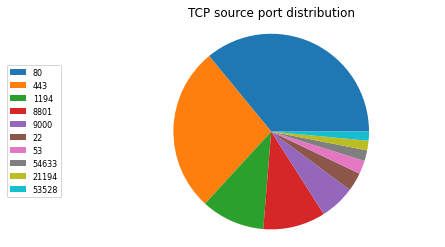

In [9]:
# data to plot
labels = []
sizes = []
for x in tcp_s_sorted_idx[:10]:
    labels.append(x)
    sizes.append(tcp_s[x])

# plot
patches, texts = plt.pie(sizes)
plt.axis('equal')
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.3, .5), fontsize=8)
plt.title("TCP source port distribution")
plt.show()

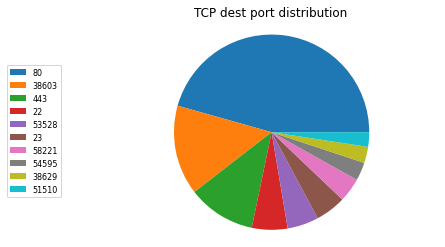

In [10]:
# data to plot
labels = []
sizes = []
for x in tcp_d_sorted_idx[:10]:
    labels.append(x)
    sizes.append(tcp_d[x])

# plot
patches, texts = plt.pie(sizes)
plt.axis('equal')
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.3, .5), fontsize=8)
plt.title("TCP dest port distribution")
plt.show()

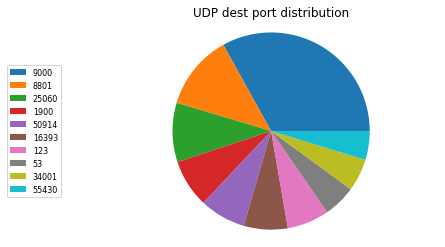

In [11]:
# data to plot
labels = []
sizes = []
for x in udp_d_idx[:10]:
    labels.append(x)
    sizes.append(udp_d[x])

# plot
patches, texts = plt.pie(sizes)
plt.axis('equal')
plt.legend(patches, labels, loc='center left', bbox_to_anchor=(-0.3, .5), fontsize=8)
plt.title("UDP dest port distribution")
plt.show()
